In [1]:
# import libraries
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# veri setini oku
diamonds = sns.load_dataset('diamonds')

# data preprocessing
diamonds["price_category"] = (diamonds["price"] > 3000).astype(int)
X = diamonds.drop(columns=["price", "price_category"])
y = diamonds["price_category"]

# train ve test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [3]:
# CatBoost modeli tanımla
cat_clf = CatBoostClassifier(
    iterations=500,                 # toplam iterasyon (ağaç) sayısı
    learning_rate=0.05,             # öğrenme oranı
    depth=8,                        # ağaç derinliği
    l2_leaf_reg=5,                  # L2 düzenleme katsayısı
    loss_function="Logloss",       # ikili sınıflandırma için log loss
    eval_metric="Accuracy",        # değerlendirme metrik
    cat_features=['cut', 'color', 'clarity'],  # kategorik değişkenler
    random_state=42,
    verbose=100,                   # her 100 iterasyonda çıktı ver
    early_stopping_rounds=30       # iyileşme olmazsa erken durdur
)

In [4]:
# model eğitimi
cat_clf.fit(X_train, y_train, eval_set=(X_test, y_test))

# tahmin
y_pred = cat_clf.predict(X_test)

0:	learn: 0.9537758	test: 0.9521691	best: 0.9521691 (0)	total: 165ms	remaining: 1m 22s
100:	learn: 0.9820583	test: 0.9840564	best: 0.9840564 (99)	total: 4.79s	remaining: 18.9s
Stopped by overfitting detector  (30 iterations wait)

bestTest = 0.9840563589
bestIteration = 99

Shrink model to first 100 iterations.


Acc: 0.9840563589173156
Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3065
           1       0.98      0.98      0.98      2329

    accuracy                           0.98      5394
   macro avg       0.98      0.98      0.98      5394
weighted avg       0.98      0.98      0.98      5394



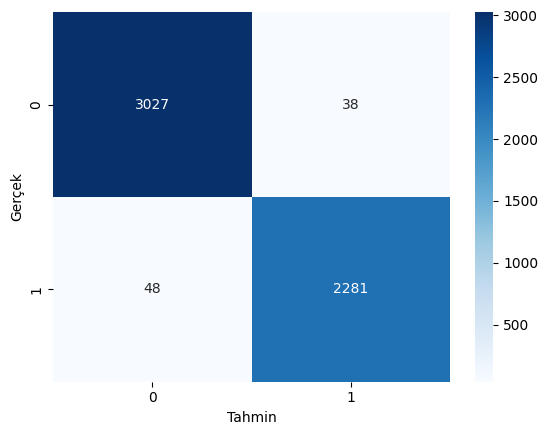

In [5]:
# değerlendirme
print(f"Acc: {accuracy_score(y_test, y_pred)}")
print(f"Classification report: \n{classification_report(y_test, y_pred)}")

# confusion matrix görselleştirme
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.show()